In [9]:
#!python3 -m pip install wfdb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
import heartpy as hp


In [2]:
# Initiate variables
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
record_name = "../aura-data/100001/100001_ECG"
record_name_ann = "../aura-data/100001/100001_ANN"

In [28]:
#record = wfdb.rdrecord(record_name, sampto=7047)
#df1=pd.DataFrame(data=record.adc())
#df1.to_csv(record_name+"_1.csv",index=False,header=None) #Write the list to a CSV file
df1=pd.read_csv(record_name+"_1.csv",header=None)
df1.head()

,0
0,32292
1,32270
2,32272
3,32286
4,32292


In [27]:
#record = wfdb.rdrecord(record_name, sampfrom=7048 ,sampto=17209)
#df2=pd.DataFrame(data=record.adc())
#df2.to_csv(record_name+"_2.csv",index=False,header=None) #Write the list to a CSV file
df2=pd.read_csv(record_name+"_2.csv",header=None)
df2.head()

,0
0,-3617
1,-3685
2,-3729
3,-3765
4,-3795


In [29]:
record = wfdb.rdrecord(record_name, sampfrom=17210 ,sampto=28694)
df3=pd.DataFrame(data=record.adc())
df3.to_csv(record_name+"_3.csv",index=False,header=None) #Write the list to a CSV file
df3=pd.read_csv(record_name+"_3.csv",header=None)
df3.head()

,0
0,-10539
1,-10505
2,-10517
3,-10565
4,-10547


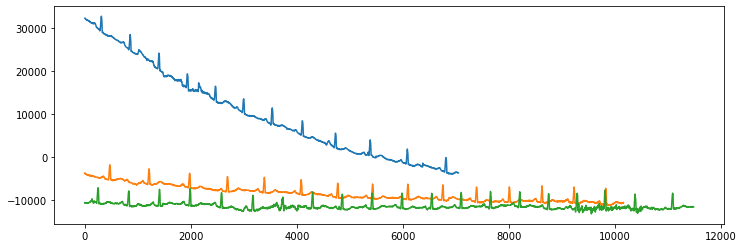

In [30]:
plt.figure(figsize=(12,4))
plt.plot(df1)
plt.plot(df2)
plt.plot(df3)
plt.show()

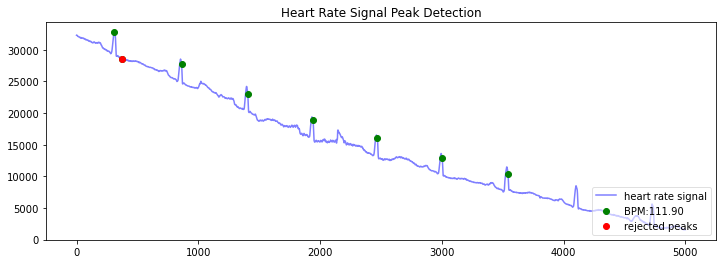

bpm: 111.898545
ibi: 536.200000
sdnn: 5.268776
sdsd: 4.322904
rmssd: 7.193747
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 2.000000
sd1: 5.059027
sd2: 4.194490
s: 66.664717
sd1/sd2: 1.206112
breathingrate: 0.372995


In [22]:
sample_rate = 1000 # there are recorded at 1000Hz

#run analysis
wd, m = hp.process(df1[0].values, sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


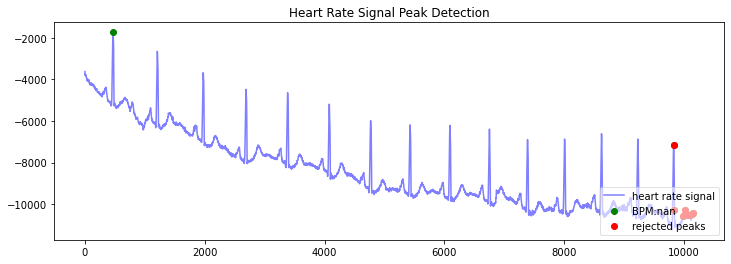

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Warning: converting a masked element to nan.
  if sys.path[0] == '':


In [31]:
b

In [32]:
sample_rate = 1000 # there are recorded at 1000Hz

#run analysis
wd, m = hp.process(df3[0].values, sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


In [36]:
header_list = ["start1", "end1", "class1","start2", "end2", "class2","start3", "end3", "class3","start", "end", "class"]
dataann = pd.read_csv("../aura-data/100001/100001_ANN.csv", names=header_list)

In [37]:
dataann.head()

,start1,end1,class1,start2,end2,class2,start3,end3,class3,start,end,class
0,1.0,198867.0,2.0,1.0,19525.0,1.0,1,7047,2,1.0,7047.0,2.0
1,198868.0,320282.0,1.0,19526.0,28694.0,2.0,7048,17209,1,7048.0,17209.0,1.0
2,320283.0,373109.0,2.0,28695.0,32739.0,1.0,17210,28390,2,17210.0,28694.0,2.0
3,373110.0,2197974.0,1.0,32740.0,96699.0,2.0,28391,32653,1,28695.0,32653.0,1.0
4,2197975.0,2582746.0,2.0,96700.0,110564.0,1.0,32654,71061,2,32654.0,112474.0,2.0


In [38]:
#dataann.tail(495)

In [39]:
dataann["class"].unique()

array([ 2.,  1.,  3., nan])

In [40]:
dataann.shape

(1246, 12)

In [41]:
dataann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start1  201 non-null    float64
 1   end1    201 non-null    float64
 2   class1  201 non-null    float64
 3   start2  311 non-null    float64
 4   end2    311 non-null    float64
 5   class2  311 non-null    float64
 6   start3  1246 non-null   int64  
 7   end3    1246 non-null   int64  
 8   class3  1246 non-null   int64  
 9   start   763 non-null    float64
 10  end     763 non-null    float64
 11  class   763 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 116.9 KB


In [45]:
#dataann_nan_class = dataann[dataann["class1"].isna() & dataann["class"].notnull() & dataann["start"].notnull() & dataann["end"].notnull() ]
#dataann_nan_class
#dataann_nan_class.index

In [44]:
"""
for i in dataann_nan_class.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataann_nan_class.start[i]), sampto=int(dataann_nan_class.end[i]))
    wfdb.plot_wfdb(record=record, title=str(dataann_nan_class["class"][i]),figsize=(10,4), ecg_grids='all')
    if i > 205:
        break
"""

'\nfor i in dataann_nan_class.index:\n    record = wfdb.rdrecord(record_name, sampfrom=int(dataann_nan_class.start[i]), sampto=int(dataann_nan_class.end[i]))\n    wfdb.plot_wfdb(record=record, title=str(dataann_nan_class["class"][i]),figsize=(10,4), ecg_grids=\'all\')\n    if i > 205:\n        break\n'

In [46]:
dataann.dropna().shape

(201, 12)

In [47]:
dataannclear = dataann.dropna()
dataannclear.astype('int32').dtypes
dataannclear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start1  201 non-null    float64
 1   end1    201 non-null    float64
 2   class1  201 non-null    float64
 3   start2  201 non-null    float64
 4   end2    201 non-null    float64
 5   class2  201 non-null    float64
 6   start3  201 non-null    int64  
 7   end3    201 non-null    int64  
 8   class3  201 non-null    int64  
 9   start   201 non-null    float64
 10  end     201 non-null    float64
 11  class   201 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 20.4 KB


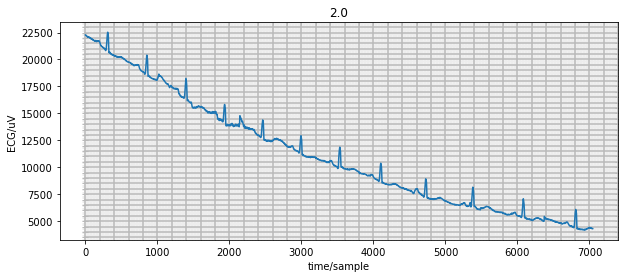

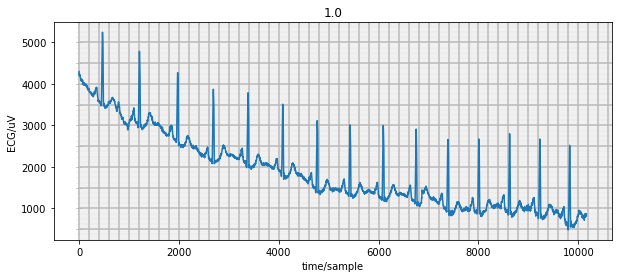

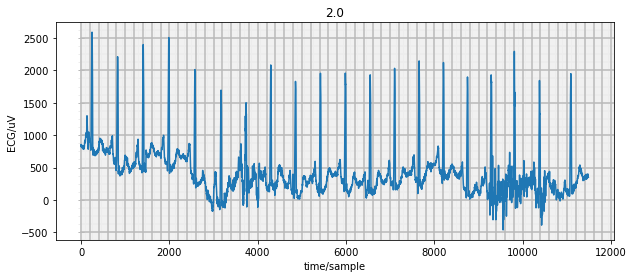

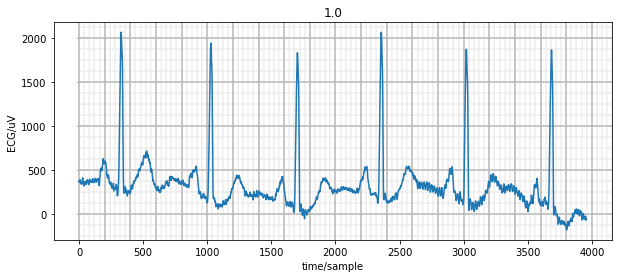

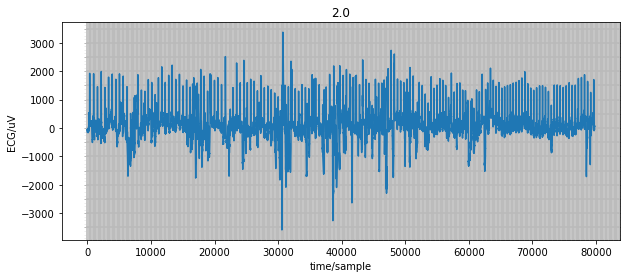

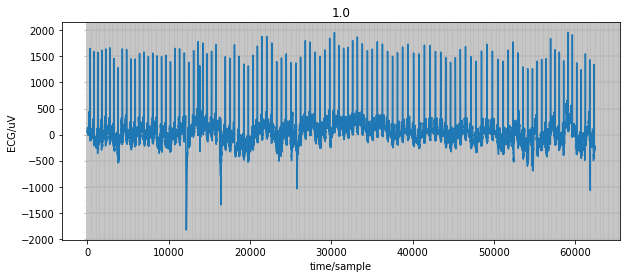

In [38]:
for i in dataannclear.index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
    wfdb.plot_wfdb(record=record, title=str(dataannclear["class"][i]),figsize=(10,4), ecg_grids='all')
    if i > 4:
        break

In [89]:
alist = list(dataannclear.index)
for i in [2,7,9,10]:
    alist.remove(i)
alist

[0,
 1,
 3,
 4,
 5,
 6,
 8,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,

indice : 0
class : 2.0


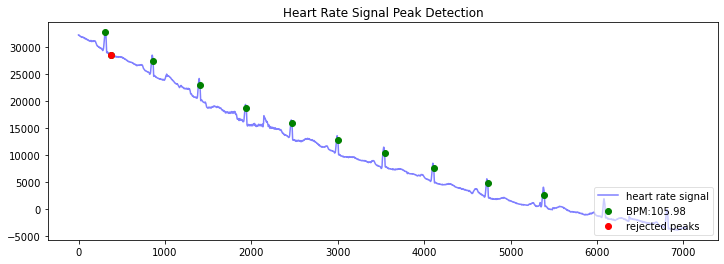

bpm: 105.983661
ibi: 566.125000
sdnn: 44.778448
sdsd: 17.920459
rmssd: 26.854103
pnn20: 0.428571
pnn50: 0.142857
hr_mad: 11.000000
sd1: 15.250293
sd2: 54.531025
s: 2612.592715
sd1/sd2: 0.279663
breathingrate: 0.220799
indice : 1
class : 1.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


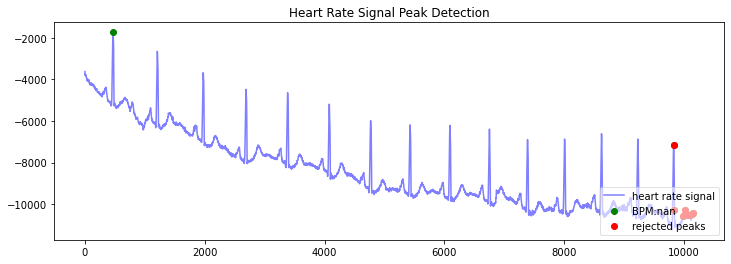

/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Warning: converting a masked element to nan.


bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan
indice : 2
class : 2.0


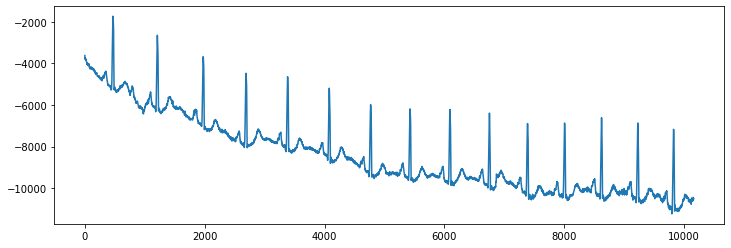

indice : 3
class : 1.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


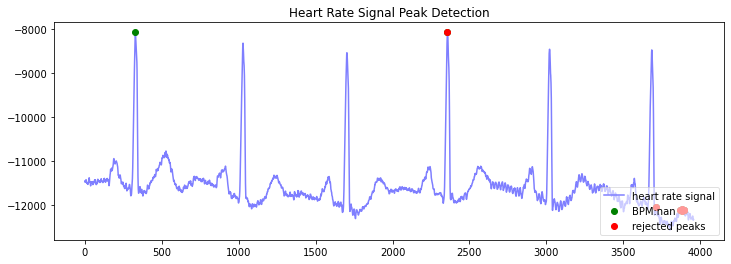

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan
indice : 4
class : 2.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Warning: converting a masked element to nan.
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


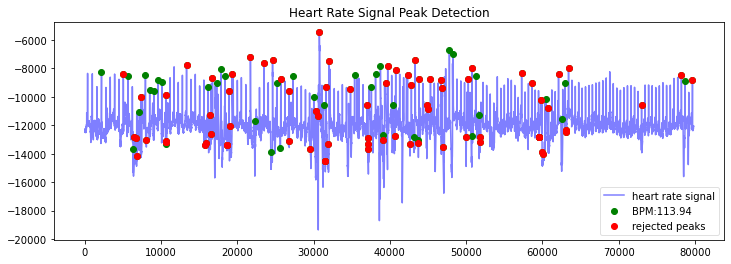

bpm: 113.944655
ibi: 526.571429
sdnn: 83.938510
sdsd: 97.249964
rmssd: 121.400165
pnn20: 0.500000
pnn50: 0.500000
hr_mad: 49.500000
sd1: 80.714173
sd2: 41.172402
s: 10440.129310
sd1/sd2: 1.960395
breathingrate: 0.678242
indice : 5
class : 1.0


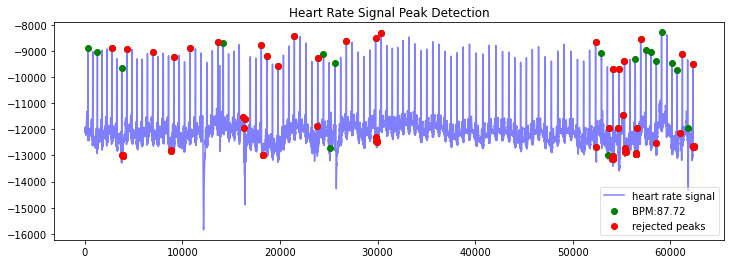

bpm: 87.719298
ibi: 684.000000
sdnn: 203.130500
sdsd: 223.456185
rmssd: 330.860494
pnn20: 0.666667
pnn50: 0.666667
hr_mad: 76.500000
sd1: 158.007384
sd2: 163.454717
s: 81138.077363
sd1/sd2: 0.966674
breathingrate: 0.182749
indice : 6
class : 2.0


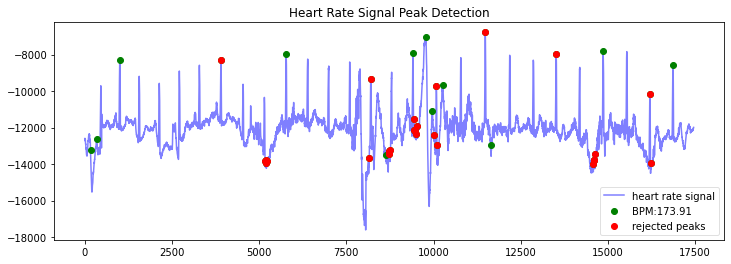

bpm: 173.913043
ibi: 345.000000
sdnn: 221.433210
sdsd: 0.000000
rmssd: 478.000000
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 17.000000
sd1: 0.000000
sd2: 0.000000
s: 0.000000
sd1/sd2: nan
breathingrate: nan
indice : 7
class : 1.0


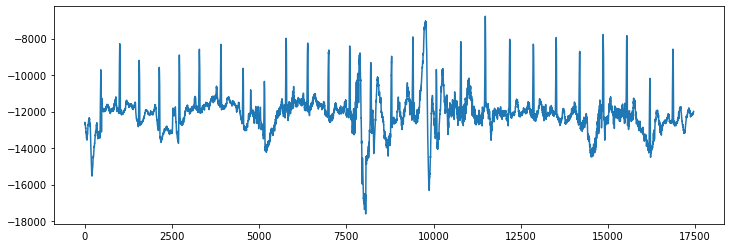

indice : 8
class : 2.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


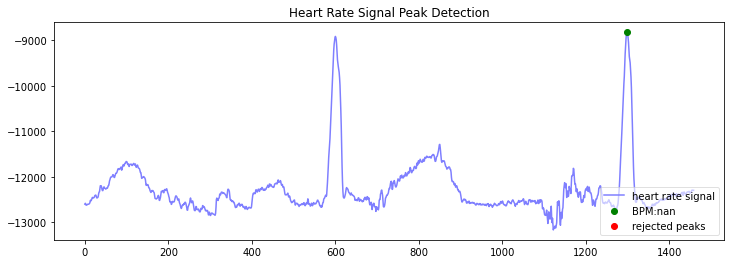

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan
indice : 9
class : 1.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Warning: converting a masked element to nan.


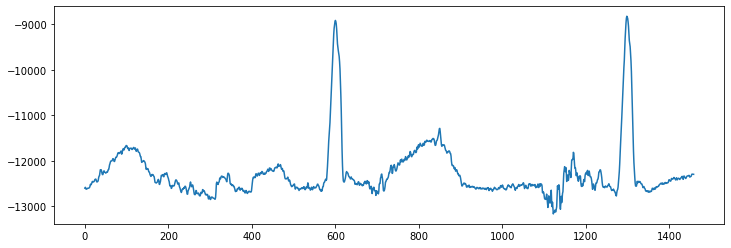

indice : 10
class : 2.0


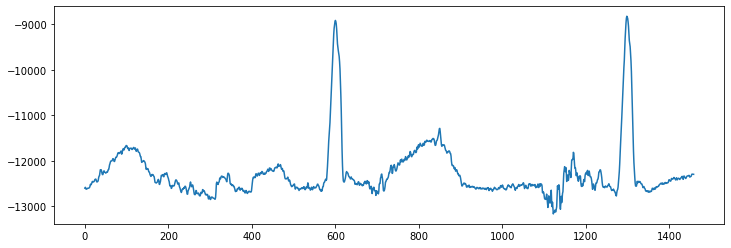

indice : 11
class : 1.0


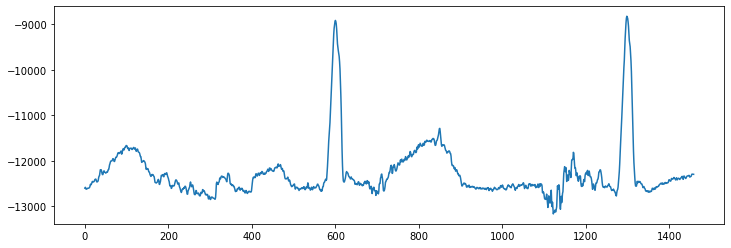

indice : 12
class : 2.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


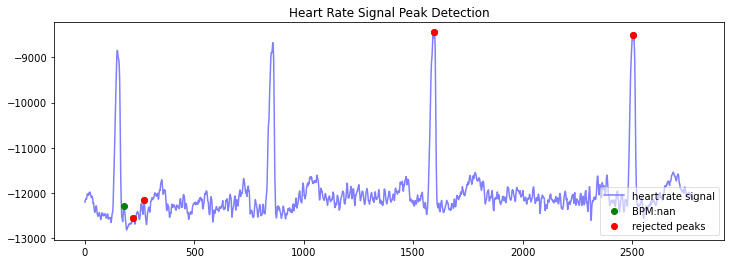

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan
indice : 13
class : 1.0


/Users/henrymacbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Warning: converting a masked element to nan.


BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


In [96]:
sample_rate = 1000 # there are recorded at 1000Hz
for i in dataannclear.index[:15]:
    print("indice :", i)
    print("class :", str(dataannclear["class"][i]))
    if i not in [2,7,9,10,11]:
        record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
        #wfdb.plot_wfdb(record=record, title=str(dataannclear["class"][i]),figsize=(10,4), ecg_grids='all')

        #run analysis
        wd, m = hp.process(record.adc().reshape(1,-1)[0], sample_rate)

        #visualise in plot of custom size
        plt.figure(figsize=(12,4))
        hp.plotter(wd, m)

        #display computed measures
        for measure in m.keys():
            print('%s: %f' %(measure, m[measure]))
    else:
        plt.figure(figsize=(12,4))
        plt.plot(record.adc().reshape(1,-1)[0])
        plt.show()
    if i > 15:
        break

In [ ]:
wd, m = hp.process(record.adc().reshape(1,-1)[0], sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [104]:
record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[9]), sampto=int(dataannclear.end[9]))

filtered = hp.filter_signal(record, cutoff = 0.005, sample_rate = sample_rate, filtertype='notch')

#visualize again
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500], label = 'original signal')
plt.plot(filtered[0:2500], alpha=0.5, label = 'filtered signal')
plt.legend()
plt.show()

IndexError: tuple index out of range

In [39]:
dataannclear[dataannclear["class1"] == 3]

,start1,end1,class1,start2,end2,class2,start3,end3,class3,start,end,class
143,68061376.0,68171863.0,3.0,39406832.0,39550532.0,2.0,33523233,33648459,1,39738001.0,39764743.0,1.0


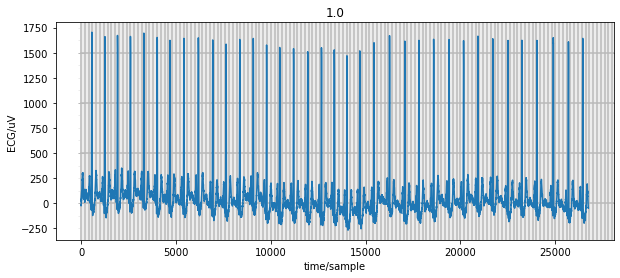

In [40]:
for i in dataannclear[dataannclear["class1"] == 3].index:
    record = wfdb.rdrecord(record_name, sampfrom=int(dataannclear.start[i]), sampto=int(dataannclear.end[i]))
    wfdb.plot_wfdb(record=record, title=str(dataannclear["class"][i]),figsize=(10,4), ecg_grids='all')
    if i > 4:
        break

In [41]:
record = wfdb.rdrecord(record_name, sampfrom=20000, sampto=25000)

In [42]:
record.adc()

array([[-11501],
       [-11515],
       [-11537],
       ...,
       [-11475],
       [-11455],
       [-11412]])

<Figure size 1440x864 with 0 Axes>

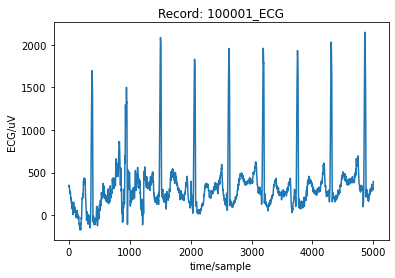

In [43]:
plt.figure(figsize=(20,12))
wfdb.plot_wfdb(record=record)

In [15]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
rcd = wfdb.rdrecord(record_name)
display(rcd.__dict__)

{'record_name': '100001_ECG',
 'n_sig': 1,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 87087000,
 'base_time': None,
 'base_date': None,
 'comments': ['ECG'],
 'sig_name': ['ECG'],
 'p_signal': array([[ 2.22905812e+04],
        [ 2.22795591e+04],
        [ 2.22805611e+04],
        ...,
        [-1.30260521e+01],
        [-2.30460922e+01],
        [-2.30460922e+01]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100001_ECG.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [1.996],
 'baseline': [-12200],
 'units': ['uV'],
 'adc_res': [0],
 'adc_zero': [0],
 'init_value': [32292],
 'checksum': [1186],
 'block_size': [0]}

In [44]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
signals, fields = wfdb.rdsamp(record_name)
display(signals)
display(fields)

array([[ 2.22905812e+04],
       [ 2.22795591e+04],
       [ 2.22805611e+04],
       ...,
       [-1.30260521e+01],
       [-2.30460922e+01],
       [-2.30460922e+01]])

{'fs': 1000,
 'sig_len': 87087000,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['uV'],
 'sig_name': ['ECG'],
 'comments': ['ECG']}

In [45]:
# Demo 3 - Read a WFDB header file only (without the signals)
record_hea = wfdb.rdheader(record_name)
display(record_hea.__dict__)

{'record_name': '100001_ECG',
 'n_sig': 1,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 87087000,
 'base_time': None,
 'base_date': None,
 'comments': ['ECG'],
 'sig_name': ['ECG'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100001_ECG.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [1.996],
 'baseline': [-12200],
 'units': ['uV'],
 'adc_res': [0],
 'adc_zero': [0],
 'init_value': [32292],
 'checksum': [1186],
 'block_size': [0]}

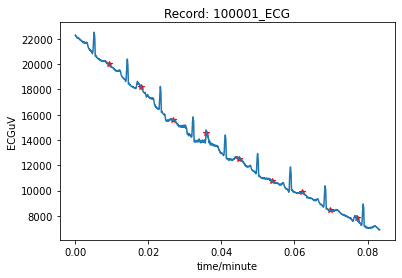

In [46]:
# Demo 4 - Read part of a WFDB annotation file into a wfdb.Annotation object, and plot the samples
import wfdb
record= wfdb.rdrecord(record_name, sampto=5000)
annotation = wfdb.rdann(record_name, 'dat', sampto=5000)
wfdb.plot_wfdb(record=record,annotation=annotation, time_units='minutes')


In [19]:
# Demo 16 - List the PhysioNet Databases
dbs = wfdb.get_dbs()
display(dbs)

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['bhx-brain-bounding-box',
  'Brain Hemorrhage Extended (BHX): Bounding box extrapolation from thick to thin slice CT images'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'],
 ['butqdb', 'Brno University of Technology ECG Quality Database (BUT QDB)'],
 ['capslpdb', 'CAP Sleep Database'],
 ['cdb', 'MIT-BIH ECG Compression Test Database'],
 ['cded', 'Cerebromicrovascular Disease in Elderly with Diabetes'],
 ['cebsdb', 'Combined measurement of ECG, Breathing and Seismocardiograms'],
 ['ce

In [20]:
from wfdb import processing

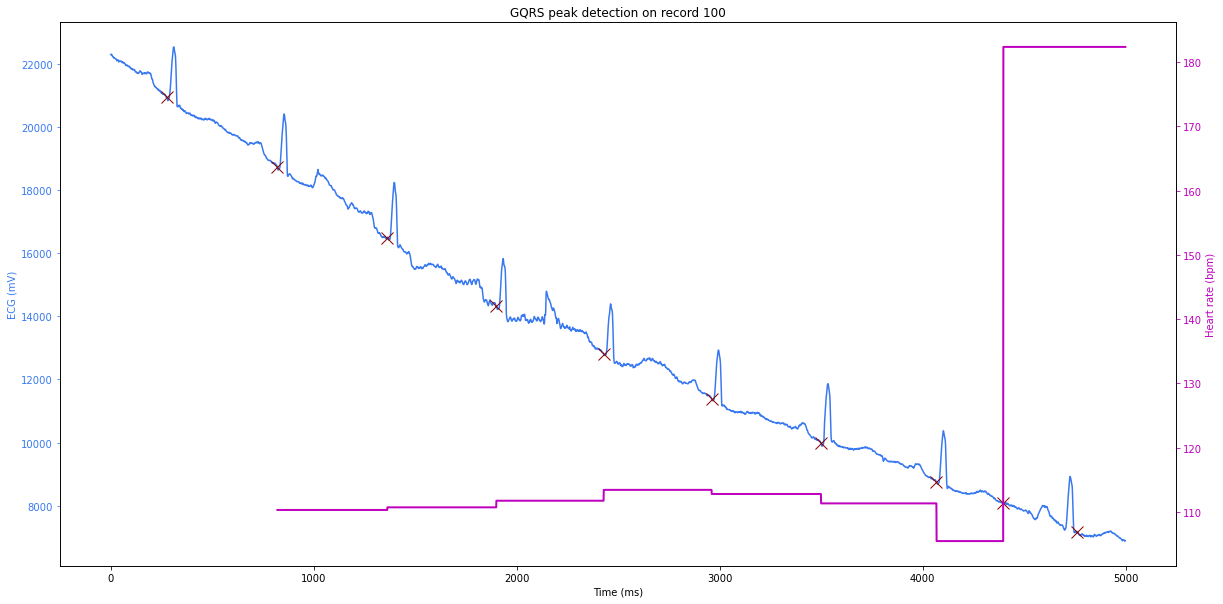

Corrected GQRS detected peak indices: [16, 854, 1397, 1933, 2463, 2994, 3533, 4102, 4613, 4998]


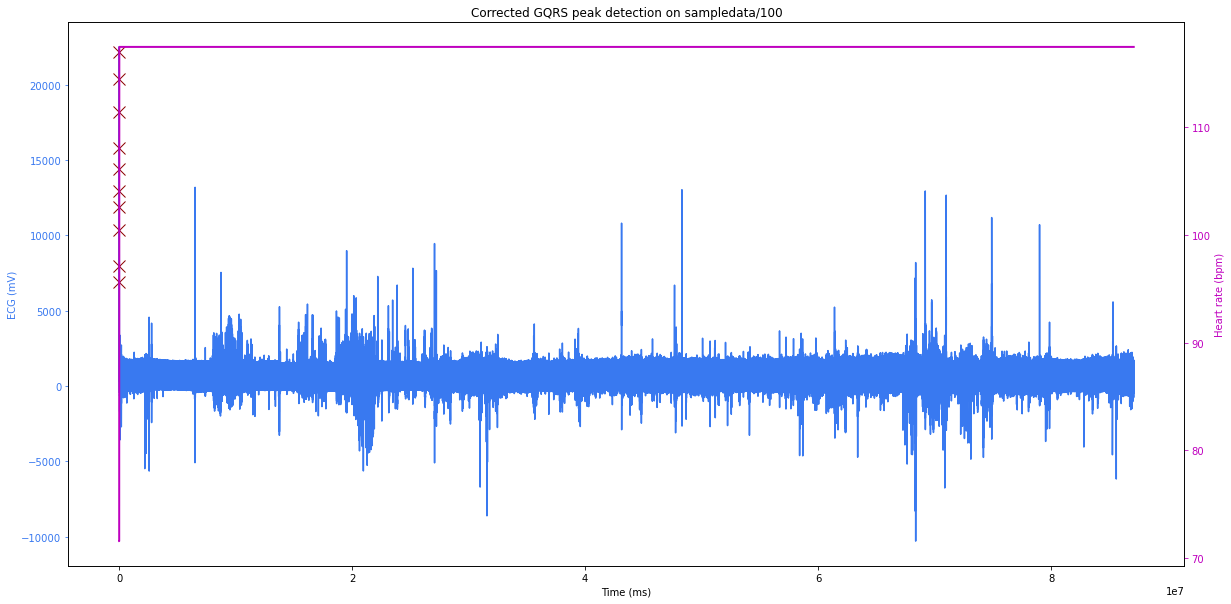

In [21]:
# Demo 19 - Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

# Load the WFDB record and the physical samples
record = wfdb.rdrecord(record_name, sampto=5000, channels=[0])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record 100")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=rcd.p_signal, peak_inds=sorted(corrected_peak_inds), fs=rcd.fs,
         title="Corrected GQRS peak detection on sampledata/100")

In [22]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord(record_name, sampto=5000)
annotation = wfdb.rdann(record_name,'hea', sampto=5000,)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')

ValueError: cannot reshape array of size 87 into shape (2)

In [ ]:
wfdb.get_record_list("/Users/david/Documents/Data-Jedha.nosync/Aura/aura-data", records='all')

In [ ]:
dbs = wfdb.get_dbs()
dbs

In [ ]:
wfdb.get_record_list('butqdb')

In [ ]:
record = wfdb.rdrecord(record_name, sampto=3000)
ann = wfdb.rdann(record_name_ann, 'csv', sampto=3000)

In [ ]:

record_name_ann = "../aura-data/100001/100001_ANN"
ann = wfdb.rdann('100001/100001_ANN', 'csv',pn_dir='butqdb',return_label_elements={"s1","e1","symbol1","s2","e2","symbol2","s3","e3","symbol3","s","e","symbol"})

In [ ]:
dataann = pd.read_csv("../aura-data/100001/100001_ANN.csv")

In [ ]:
dataann.head()

In [ ]:
dataann.describe()

In [ ]:
# Demo 15 - View the standard WFDB annotation labels
wfdb.show_ann_labels()

In [ ]:
record = wfdb.rdrecord(file_name, sampto=3000)
dat = wfdb.rdann(file_name, 'dat', sampto=3000)

In [ ]:
record.adc().shape

In [ ]:
record.adc().shape

In [ ]:
record.adc()

In [ ]:
#import matplotlib.pyplot as plt
#plt.figure(num=None, figsize=(30, 15), dpi=80, facecolor='w', edgecolor='k')
wfdb.plot_wfdb(record=record, title='Record 100001') 
display(record.__dict__)

In [ ]:
record_ecg_tot = wfdb.rdrecord(file_name)
record_ecg_tot.adc().shape

In [ ]:
file_name = "../brno-university-of-technology-ecg-quality-database-but-qdb-1.0.0/100001/100001_ECG"
record_ecg = wfdb.rdrecord(file_name, sampto=3000) # , sampto=3000


In [ ]:
record_ecg.adc()

In [ ]:
wfdb.plot_wfdb(record=record_ecg, title='Record 100001') 
display(record_ecg.__dict__)

In [ ]:
record_ecg.adc()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig = px.histogram(record_ecg.adc()[:300])
fig.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [ ]:
df = pd.read_csv("../brno-university-of-technology-ecg-quality-database-but-qdb-1.0.0/100001/100001_ANN.csv",header=None)
df.head()

In [ ]:
df.shape

In [ ]:
!pwd